# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Day 2 APIs, Activity 5 for reference

url= f"http://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid={weather_api_key}"
units = "imperial"


#Build partial query URl
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(url)
weather =response.json()

pprint(weather)
#response.text


{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 35, 'lon': 139},
 'dt': 1587235352,
 'id': 1851632,
 'main': {'feels_like': 282.67,
          'humidity': 81,
          'pressure': 1004,
          'temp': 283.86,
          'temp_max': 285.37,
          'temp_min': 282.59},
 'name': 'Shuzenji',
 'sys': {'country': 'JP',
         'id': 2019346,
         'sunrise': 1587240412,
         'sunset': 1587287938,
         'type': 3},
 'timezone': 32400,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 13, 'gust': 1.34, 'speed': 0.89}}


In [4]:
#Day 2 APIs, Activity 5  and Activity 8 for reference

number = 0 

#Set up lists to hold response info
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []

for city in cities: 
    try:
        response = requests.get(url + '&q=' + city).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        print(f"Success {city}")
    except:
        print(f"Unknown Data for:{city}")
        number = number + 1
        
        
print(response)
print(city_name)
print(temp)
print(humidity)
print(cloudiness)
print(wind_speed)
print(lat)
print(len(city_name))
print(len(cities))



Success buala
Success tuktoyaktuk
Unknown Data for:tawkar
Success narsaq
Success elista
Success mataura
Success lompoc
Success ushuaia
Success corinto
Success chulym
Success chokurdakh
Success hobart
Success shenjiamen
Success teahupoo
Success puerto ayora
Success pailon
Success qaanaaq
Success busselton
Success klaksvik
Success hithadhoo
Success pisco
Success arraial do cabo
Success tabou
Success tasiilaq
Success kruisfontein
Success castro
Success punta arenas
Success abu samrah
Success tiksi
Success faanui
Success jamestown
Success atuona
Success albany
Unknown Data for:karaul
Success khatanga
Success verkhoyansk
Success pokhara
Success dublin
Success rikitea
Success provideniya
Success colotlan
Success new norfolk
Success kamuli
Success port alfred
Success isangel
Unknown Data for:belushya guba
Success zhigansk
Success bambous virieux
Success sinop
Success hilo
Unknown Data for:amderma
Success krasnik
Success tuatapere
Success liverpool
Success vinderei
Success dwarka
Success kodia

Success hun
Success san angelo
Success corner brook
Success sabaudia
Success sabla
Success ternate
Success san jeronimo
Success broken hill
Success khandbari
Success la concordia
Success samarai
Success bereda
Success tarko-sale
Success oleksandrivka
Success touros
Success qalyub
Success yotoco
Success ipojuca
Success rupert
Success sioux lookout
Success henties bay
Success havelock
Success coihaique
Success noyabrsk
Success elko
Success flin flon
Success qunduz
Success naze
Success kolosovka
Success goba
Success sundsvall
Success areosa
Success balkhash
Success malahide
Success irbil
Success ambanja
Success moron
Success sukhobuzimskoye
Success san quintin
Success hayden
Success miri
Success salto
Success redondela
Success lakatoro
Success merauke
Success fare
Success sulangan
Success basoko
Success atar
Success gouyave
Success jinchang
Success ericeira
Success jacqueville
Success ormara
Success salina cruz
Success vostok
Success puerto escondido
Success margate
Success iseyin
Success

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Day 2 APIs, Activity 5 for reference

#Create Data Frame
response_df= pd. DataFrame({
        'City':city_name,
        'Temperature': temp,
        'Humidity': humidity,
        'Cloudiness': cloudiness,
        'Wind Speed': wind_speed,
        'Latitude': lat,
        'Longitude': lng})

response_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Buala,299.97,80,97,2.08,-8.14,159.59
1,Tuktoyaktuk,259.15,77,40,3.10,69.45,-133.04
2,Narsaq,274.15,43,40,2.60,60.92,-46.05
3,Elista,285.95,67,99,3.00,46.31,44.26
4,Mataura,279.26,93,100,1.79,-46.19,168.86


In [6]:
#Export the city data into a .csv. 
pd.DataFrame.to_csv(response_df, 'response.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
response_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Buala,299.97,80,97,2.08,-8.14,159.59
1,Tuktoyaktuk,259.15,77,40,3.10,69.45,-133.04
2,Narsaq,274.15,43,40,2.60,60.92,-46.05
3,Elista,285.95,67,99,3.00,46.31,44.26
4,Mataura,279.26,93,100,1.79,-46.19,168.86


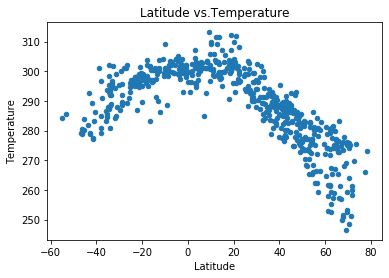

In [8]:
#plt.scatter(response_df["Latitude"], response_df['Temperature'],marker='o')
#plt.show()

response_df.plot(kind = "scatter", x="Latitude", y="Temperature", title="Latitude vs.Temperature")
plt.show()

#### Latitude vs. Humidity Plot

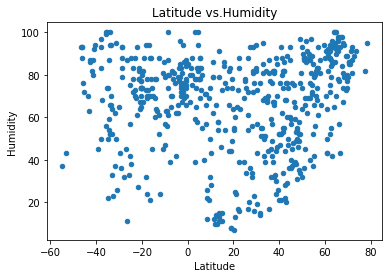

In [9]:
#plt.scatter(response_df["Latitude"], response_df['Humidity'],marker='o')
#plt.show()

response_df.plot(kind = "scatter", x="Latitude", y="Humidity", title="Latitude vs.Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

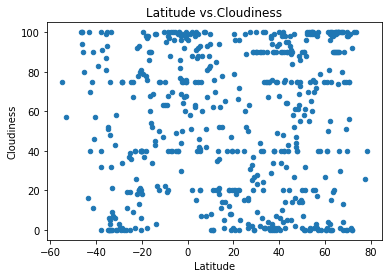

In [10]:
response_df.plot(kind = "scatter", x="Latitude", y="Cloudiness", title="Latitude vs.Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

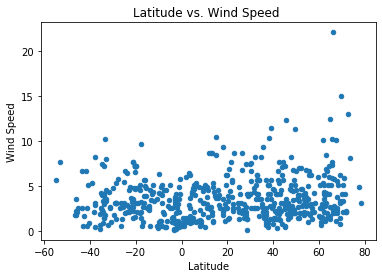

In [11]:
response_df.plot(kind = "scatter", x="Latitude", y="Wind Speed", title="Latitude vs. Wind Speed ")
plt.show()

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_hem=response_df[response_df["Latitude"]>=0]
south_hem=response_df[response_df["Latitude"]<=0]
                

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1      267.630738
2      272.693677
3      281.365370
5      288.292041
7      286.333342
          ...    
553    307.024322
554    296.221802
555    279.638154
557    306.608840
558    269.856532
Name: Latitude, Length: 376, dtype: float64
The r-squared is: 0.7590301755059593


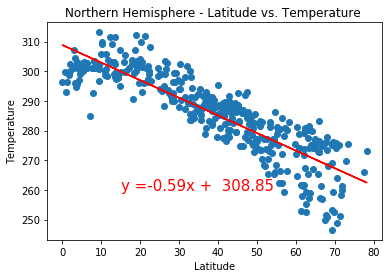

In [13]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = north_hem["Latitude"]
y_values = north_hem["Temperature"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere - Latitude vs. Temperature ")
plt.annotate(line_eq,(15,260),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      300.323469
4      285.686822
6      282.374824
10     286.960076
12     296.596029
          ...    
546    294.884253
547    293.230177
550    293.772560
552    295.653590
556    301.062033
Name: Latitude, Length: 183, dtype: float64
The r-squared is: 0.5530852853700207


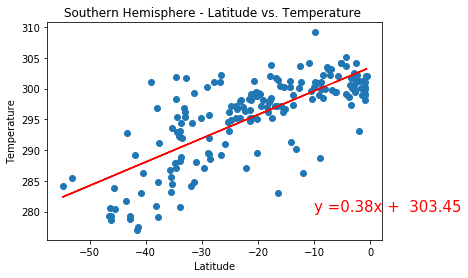

In [14]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = south_hem["Latitude"]
y_values = south_hem["Temperature"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere - Latitude vs. Temperature ")
plt.annotate(line_eq,(-10,280),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      76.173341
2      73.010990
3      67.594583
5      63.268131
7      64.491550
         ...    
553    51.567803
554    58.315140
555    68.673416
557    51.827316
558    74.783093
Name: Latitude, Length: 376, dtype: float64
The r-squared is: 0.09962954671261691


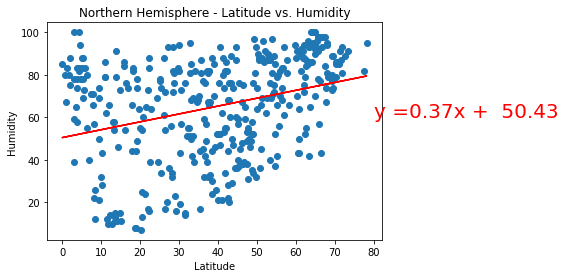

In [15]:
#Day 2 API's Activity 7 Stu_Weather_plots for reference

x_values = north_hem["Latitude"]
y_values = north_hem["Humidity"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.annotate(line_eq,(80,60),fontsize=20,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      71.058066
4      68.411361
6      67.812462
10     68.641600
12     70.384043
         ...    
546    70.074508
547    69.775406
550    69.873483
552    70.213625
556    71.191619
Name: Latitude, Length: 183, dtype: float64
The r-squared is: 0.002485848265000103


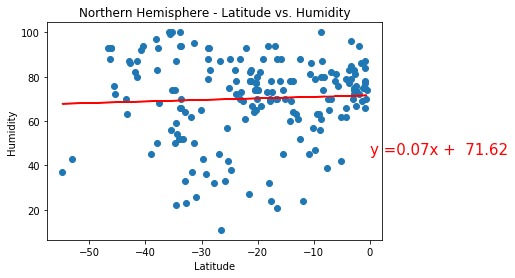

In [16]:
x_values = south_hem["Latitude"]
y_values = south_hem["Humidity"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.annotate(line_eq,(0,45),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      58.261975
2      56.928422
3      54.644341
5      52.819890
7      53.335801
         ...    
553    47.885899
554    50.731229
555    55.099281
557    47.995334
558    57.675712
Name: Latitude, Length: 376, dtype: float64
The r-squared is: 0.007500144264942965


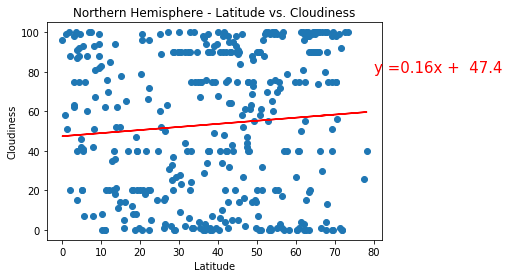

In [17]:
x_values = north_hem["Latitude"]
y_values = north_hem["Cloudiness"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.annotate(line_eq,(80,80),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      63.173063
4      39.549864
6      34.204378
10     41.604865
12     57.157063
         ...    
546    54.394297
547    51.724659
550    52.600052
552    55.635990
556    64.365088
Name: Latitude, Length: 183, dtype: float64
The r-squared is: 0.059212097162500824


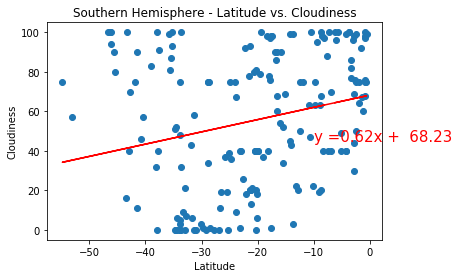

In [18]:
x_values = south_hem["Latitude"]
y_values = south_hem["Cloudiness"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.annotate(line_eq,(-10,45),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      4.327046
2      4.184094
3      3.939247
5      3.743672
7      3.798976
         ...   
553    3.214764
554    3.519774
555    3.988015
557    3.226495
558    4.264201
Name: Latitude, Length: 376, dtype: float64
The r-squared is: 0.017273940530401398


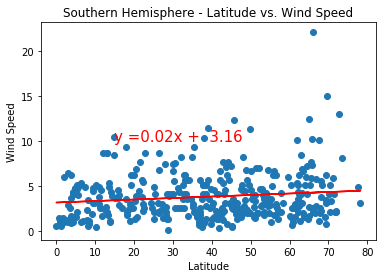

In [19]:
x_values = north_hem["Latitude"]
y_values = north_hem["Wind Speed"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      2.954056
4      3.968205
6      4.197688
10     3.879984
12     3.212324
         ...   
546    3.330930
547    3.445538
550    3.407958
552    3.277624
556    2.902882
Name: Latitude, Length: 183, dtype: float64
The r-squared is: 0.02836889020954346


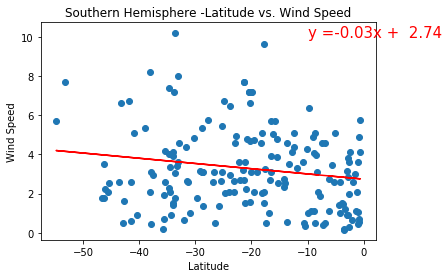

In [20]:
x_values = south_hem["Latitude"]
y_values = south_hem["Wind Speed"]

#Perform a linear regression on Temp Vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept
print(regress_values) 

#Create line equation string
line_eq = f"y ={round(slope,2)}x +  {round(intercept,2)}"
line_eq

#Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
         
#Label plot and annotacte the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere -Latitude vs. Wind Speed")
plt.annotate(line_eq,(-10,10),fontsize=15,color="red")
         
#Print r square value
print(f"The r-squared is: {rvalue**2}")
         
# Show plot
plt.show()